In [ ]:
from quantum_random_forest import QuantumRandomForest, set_multiprocessing
from split_function import SplitCriterion
from data_construction import data_preprocessing
import numpy as np
import matplotlib.pyplot as plt
import qsvm
from sklearn import metrics, datasets

C:\Users\amanc\anaconda3\envs\tens_rf\lib\site-packages\qiskit\circuit\equivalence.py:18: DeprecationWarning: The retworkx package is deprecated and has been renamed to rustworkx. Rustworkx is a drop-in replacement and can be used by replacing `import retworkx` with import `rustworkx`. 
  import retworkx as rx


In [2]:
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

import pickle
from os import path
print('done')

done


In [3]:
train_df = pd.read_csv("Train_data.csv")
test_df = pd.read_csv("Test_data.csv")

In [4]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
train_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [7]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [9]:
test_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [10]:
cat_features = train_df.select_dtypes(include = 'object')

In [11]:
cat_features.columns

Index(['protocol_type', 'service', 'flag', 'class'], dtype='object')

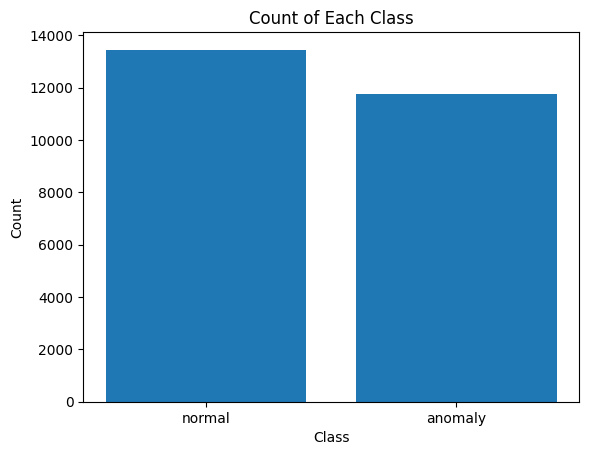

In [12]:
class_counts = train_df['class'].value_counts()

plt.bar(class_counts.index, class_counts.values)

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Each Class')

plt.show()

In [13]:
train_df['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

In [15]:
# sns.countplot(data = train_df, x ='protocol_type', hue = 'class')

In [16]:
# plt.figure(figsize = (12,6))
# sns.countplot(data = train_df, x = 'service', hue = 'class')
# plt.xticks(rotation = 90)

In [17]:
# sns.countplot(data = train_df, x = 'flag', hue = 'class')

In [18]:
labels ={'normal':0,'anomaly':1}
train_df['labels'] = train_df['class'].map(labels)

In [19]:
train_df[['class','labels']].head()

,class,labels
0,normal,0
1,normal,0
2,anomaly,1
3,normal,0
4,normal,0


In [20]:
num_features = train_df.select_dtypes(include = ['int64','float64'])

In [21]:
num_features.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')

In [22]:
num_features.corr()['labels'].sort_values()

same_srv_rate                 -0.749237
dst_host_srv_count            -0.719292
dst_host_same_srv_rate        -0.692212
logged_in                     -0.688084
srv_diff_host_rate            -0.120649
is_guest_login                -0.038662
num_access_files              -0.036999
su_attempted                  -0.025851
num_root                      -0.019753
num_compromised               -0.018620
root_shell                    -0.018579
num_file_creations            -0.018322
num_shells                    -0.013454
hot                           -0.012839
dst_bytes                     -0.010949
num_failed_logins              0.000028
land                           0.000605
srv_count                      0.002370
src_bytes                      0.005743
urgent                         0.006743
duration                       0.050901
dst_host_srv_diff_host_rate    0.062928
dst_host_same_src_port_rate    0.092974
wrong_fragment                 0.097625
diff_srv_rate                  0.193528


In [23]:
num_features.corr()['labels'].drop('labels').sort_values()

same_srv_rate                 -0.749237
dst_host_srv_count            -0.719292
dst_host_same_srv_rate        -0.692212
logged_in                     -0.688084
srv_diff_host_rate            -0.120649
is_guest_login                -0.038662
num_access_files              -0.036999
su_attempted                  -0.025851
num_root                      -0.019753
num_compromised               -0.018620
root_shell                    -0.018579
num_file_creations            -0.018322
num_shells                    -0.013454
hot                           -0.012839
dst_bytes                     -0.010949
num_failed_logins              0.000028
land                           0.000605
srv_count                      0.002370
src_bytes                      0.005743
urgent                         0.006743
duration                       0.050901
dst_host_srv_diff_host_rate    0.062928
dst_host_same_src_port_rate    0.092974
wrong_fragment                 0.097625
diff_srv_rate                  0.193528


In [24]:
# plt.figure(figsize = (12, 6))
# sns.heatmap(data = num_features.corr(), cmap = 'viridis')

In [25]:
correlation_matrix = num_features.corr()

threshold = 0.90

strong_correlations = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            strong_correlations.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

strong_correlations_df = pd.DataFrame(strong_correlations, columns=['Feature 1', 'Feature 2', 'Correlation Coefficient'])

strong_correlations_df

,Feature 1,Feature 2,Correlation Coefficient
0,num_root,num_compromised,0.998956
1,srv_serror_rate,serror_rate,0.993290
2,srv_rerror_rate,rerror_rate,0.989134
3,dst_host_serror_rate,serror_rate,0.978022
4,dst_host_serror_rate,srv_serror_rate,0.976363
5,dst_host_srv_serror_rate,serror_rate,0.979602
6,dst_host_srv_serror_rate,srv_serror_rate,0.984621
7,dst_host_srv_serror_rate,dst_host_serror_rate,0.984706
8,dst_host_rerror_rate,rerror_rate,0.928992
9,dst_host_rerror_rate,srv_rerror_rate,0.919537


In [26]:
strong_correlations_list = list(strong_correlations_df['Feature 1'])

In [27]:
strong_correlations_list

['num_root',
 'srv_serror_rate',
 'srv_rerror_rate',
 'dst_host_serror_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_rerror_rate']

In [28]:
train_df.shape

(25192, 43)

In [29]:
train_df = train_df.drop(strong_correlations_list, axis = 1)

In [30]:
train_df.shape

(25192, 36)

In [31]:
train_df['service'].nunique()

66

In [32]:
train_df = train_df.drop('service', axis = 1)

In [33]:
train_df.shape

(25192, 35)

In [34]:
test_df.shape

(22544, 41)

In [35]:
test_df = test_df.drop(strong_correlations_list, axis = 1)

In [36]:
test_df.shape

(22544, 34)

In [37]:
test_df = test_df.drop('service', axis = 1)

In [38]:
test_df.shape

(22544, 33)

In [39]:
missing_columns = train_df.columns[~train_df.columns.isin(test_df.columns)]
missing_columns_list = missing_columns.tolist()
print(missing_columns_list)

['class', 'labels']


In [40]:
#feature engineering

In [41]:
train_df = train_df.drop('class', axis = 1)

In [42]:
cat_features.columns

Index(['protocol_type', 'service', 'flag', 'class'], dtype='object')

In [43]:
train_dummies = pd.get_dummies(train_df[['protocol_type','flag']], drop_first=True )

In [44]:
train_df.drop(['protocol_type','flag'], axis =1, inplace = True)

train_df = pd.concat([train_df, train_dummies], axis =1)

In [45]:
train_df.shape

(25192, 44)

In [46]:
test_dummies = pd.get_dummies(test_df[['protocol_type','flag']], drop_first=True )

In [47]:
test_df.drop(['protocol_type','flag'], axis =1, inplace = True)

test_df = pd.concat([test_df, test_dummies], axis = 1)

In [48]:
X = train_df.drop('labels', axis = 1)
y = train_df['labels']

In [49]:
n_qubits = 4                                       
dt_type = 'qke'                                    
ensemble_var = None                               
branch_var = ['eff_anz_pqc_arch', 
              'iqp_anz_pqc_arch', 
              'eff_anz_pqc_arch']                   
num_trees = 2                                       
split_num = 2                                      
pqc_sample_num = 2024                           
num_classes = 2                         
max_depth = 4                                       
num_params_split = n_qubits*(n_qubits +1)           
num_rand_gen = 1                                 
num_rand_meas_q = n_qubits                        
svm_num_train = 5                                 
svm_c = 10                                        
min_samples_split = svm_num_train                    
embedding_type = ['as_params_all', 
                  'as_params_iqp', 
                  'as_params_all']                  
criterion = SplitCriterion.init_info_gain('clas')    
device = 'cirq'                                     
print("done")

done


In [50]:
qrf = QuantumRandomForest(n_qubits, 'clas', num_trees, criterion, max_depth=max_depth, 
                          min_samples_split=min_samples_split, tree_split_num=split_num, num_rand_meas_q=num_rand_meas_q,
                          ensemble_var=ensemble_var, dt_type=dt_type, num_classes=num_classes, ensemble_vote_type='ave',
                          num_params_split=num_params_split, num_rand_gen=num_rand_gen, pqc_sample_num=pqc_sample_num,
                          embed=embedding_type, branch_var=branch_var, svm_num_train=svm_num_train, svm_c=svm_c, 
                          nystrom_approx=True, device=device)
print("done")

done


In [51]:
#lets train

In [60]:
import time
start = time.time()
qrf.train(training_set, 
          partition_sample_size=180)  # Partition size is the number of instances given to each tree. Set to None to use all the data for all trees

elapsed = time.time() - start
trainingtime = elapsed
print(f"Training time: {elapsed} seconds")

print("done")

 32%|███▏      | 8/25 [00:00<00:00, 72.20it/s]



Training tree 1 of 2 ------------------------------------------------------------

---Training sub-tree of depth: 1 (180 instances)


  8%|▊         | 2/25 [00:00<00:01, 17.24it/s]

Info gain: 0.3624
Accuracy for binary dataset: 0.8389
Number of SV: [37 36]
----> Selected SVM info gain: 0.3624

---Training sub-tree of depth: 2 (87 instances)


 16%|█▌        | 4/25 [00:00<00:00, 30.76it/s]

Info gain: 0.0000
Accuracy for binary dataset: 0.8161
Number of SV: [26 16]
Increase SVM_C...


 16%|█▌        | 4/25 [00:00<00:00, 38.60it/s]

Info gain: 0.0000
Accuracy for binary dataset: 0.8161
Number of SV: [21 16]
Increase SVM_C...


  0%|          | 0/430 [00:00<?, ?it/s]

Info gain: 0.0285
Accuracy for binary dataset: 0.8276
Number of SV: [17 16]
----> Selected SVM info gain: 0.0285

---Training sub-tree of depth: 3 (86 instances)


  0%|          | 0/430 [00:00<?, ?it/s]

Info gain: 0.0000
Accuracy for binary dataset: 0.1744
Number of SV: [15 22]
Increase SVM_C...


  0%|          | 0/430 [00:00<?, ?it/s]

Info gain: 0.0000
Accuracy for binary dataset: 0.8256
Number of SV: [20 15]
Increase SVM_C...


  5%|▍         | 21/430 [00:00<00:02, 187.30it/s]

Info gain: 0.0000
Accuracy for binary dataset: 0.8256
Number of SV: [19 15]
Increase SVM_C...


 12%|█▏        | 3/25 [00:00<00:00, 22.67it/s]

Info gain: 0.0000
Accuracy for binary dataset: 0.8256
Number of SV: [17 15]
Increase SVM_C...
----> Selected SVM info gain: 0.0000

---Training sub-tree of depth: 4 (0 instances)

---Training sub-tree of depth: 4 (86 instances)

---Training sub-tree of depth: 3 (1 instances)

---Training sub-tree of depth: 2 (93 instances)


 12%|█▏        | 3/25 [00:00<00:00, 29.35it/s]

Info gain: 0.0000
Accuracy for binary dataset: 0.8602
Number of SV: [13 15]
Increase SVM_C...


 32%|███▏      | 8/25 [00:00<00:00, 76.90it/s]

Info gain: 0.0902
Accuracy for binary dataset: 0.1183
Number of SV: [15 13]
----> Selected SVM info gain: 0.0902

---Training sub-tree of depth: 3 (85 instances)


  0%|          | 0/40 [00:00<?, ?it/s]

Info gain: 0.0411
Accuracy for binary dataset: 0.9176
Number of SV: [ 8 10]
----> Selected SVM info gain: 0.0411

---Training sub-tree of depth: 4 (1 instances)

---Training sub-tree of depth: 4 (84 instances)

---Training sub-tree of depth: 3 (8 instances)


 32%|███▏      | 8/25 [00:00<00:00, 78.15it/s]

Info gain: 0.4669
Accuracy for binary dataset: 0.8750
Number of SV: [3 3]
----> Selected SVM info gain: 0.4669

---Training sub-tree of depth: 4 (6 instances)

---Training sub-tree of depth: 4 (2 instances)


Training tree 2 of 2 ------------------------------------------------------------

---Training sub-tree of depth: 1 (180 instances)
Kernel Dictionary given to the tree.


 12%|█▏        | 3/25 [00:00<00:00, 27.68it/s]

Info gain: 0.4946
Accuracy for binary dataset: 0.1111
Number of SV: [26 25]
----> Selected SVM info gain: 0.4946

---Training sub-tree of depth: 2 (83 instances)


 12%|█▏        | 3/25 [00:00<00:00, 29.56it/s]

Info gain: 0.0000
Accuracy for binary dataset: 0.1084
Number of SV: [20  9]
Increase SVM_C...


  0%|          | 0/25 [00:00<?, ?it/s]

Info gain: 0.0000
Accuracy for binary dataset: 0.1084
Number of SV: [17  9]
Increase SVM_C...


 16%|█▌        | 4/25 [00:00<00:00, 33.06it/s]

Info gain: 0.0000
Accuracy for binary dataset: 0.1084
Number of SV: [17  9]
Increase SVM_C...


 28%|██▊       | 7/25 [00:00<00:00, 66.50it/s]

Info gain: 0.0000
Accuracy for binary dataset: 0.1084
Number of SV: [13  9]
Increase SVM_C...
----> Selected SVM info gain: 0.0000

---Training sub-tree of depth: 3 (83 instances)


  4%|▍         | 16/415 [00:00<00:02, 155.15it/s]

Info gain: 0.0000
Accuracy for binary dataset: 0.1084
Number of SV: [17  9]
Increase SVM_C...


  0%|          | 0/415 [00:00<?, ?it/s]

Info gain: 0.0000
Accuracy for binary dataset: 0.1084
Number of SV: [13  9]
Increase SVM_C...


  0%|          | 0/415 [00:00<?, ?it/s]

Info gain: 0.0000
Accuracy for binary dataset: 0.1084
Number of SV: [12  9]
Increase SVM_C...


 12%|█▏        | 3/25 [00:00<00:00, 22.25it/s]

Info gain: 0.0000
Accuracy for binary dataset: 0.1084
Number of SV: [14  9]
Increase SVM_C...
----> Selected SVM info gain: 0.0000

---Training sub-tree of depth: 4 (83 instances)

---Training sub-tree of depth: 4 (0 instances)

---Training sub-tree of depth: 3 (0 instances)

---Training sub-tree of depth: 2 (97 instances)


 40%|████      | 10/25 [00:00<00:00, 78.41it/s]

Info gain: 0.0000
Accuracy for binary dataset: 0.8866
Number of SV: [26 11]
Increase SVM_C...


 12%|█▏        | 3/25 [00:00<00:00, 28.59it/s]

Info gain: 0.0000
Accuracy for binary dataset: 0.8866
Number of SV: [19 11]
Increase SVM_C...


 36%|███▌      | 9/25 [00:00<00:00, 80.29it/s]

Info gain: 0.0000
Accuracy for binary dataset: 0.8866
Number of SV: [18 11]
Increase SVM_C...


 32%|███▏      | 8/25 [00:00<00:00, 72.00it/s]

Info gain: 0.0000
Accuracy for binary dataset: 0.8866
Number of SV: [15 11]
Increase SVM_C...
----> Selected SVM info gain: 0.0000

---Training sub-tree of depth: 3 (97 instances)


 32%|███▏      | 8/25 [00:00<00:00, 78.10it/s]

Info gain: 0.0000
Accuracy for binary dataset: 0.8866
Number of SV: [18 11]
Increase SVM_C...


 36%|███▌      | 9/25 [00:00<00:00, 86.10it/s]

Info gain: 0.0000
Accuracy for binary dataset: 0.8866
Number of SV: [18 11]
Increase SVM_C...


  2%|▏         | 11/485 [00:00<00:04, 107.21it/s]

Info gain: 0.0000
Accuracy for binary dataset: 0.8866
Number of SV: [16 11]
Increase SVM_C...


100%|██████████| 485/485 [00:03<00:00, 131.61it/s]


Info gain: 0.0673
Accuracy for binary dataset: 0.9072
Number of SV: [14 11]
----> Selected SVM info gain: 0.0673

---Training sub-tree of depth: 4 (95 instances)

---Training sub-tree of depth: 4 (2 instances)

---Training sub-tree of depth: 3 (0 instances)
Training time: 336.1374976634979 seconds
done


In [ ]:
import time
start = time.time()

acc, preds_qrf = qrf.test(testing_set, 
                          ret_pred=True, 
                          parallel=False,            # Set to False if you don't want parallel computation. Needs to be False for calc_tree_corr to be True.
                          calc_tree_corr=True)       # True is required to later look at correlations between trees

Telapsed = time.time() - start
testingtime= Telapsed
print(f"Testing time: {Telapsed} seconds")
print("done")

100%|██████████| 5/5 [00:00<00:00, 55.76it/s]

100%|██████████| 5/5 [00:00<00:00, 30.39it/s]

100%|██████████| 5/5 [00:00<00:00, 62.31it/s]

100%|██████████| 5/5 [00:00<00:00, 63.83it/s]

100%|██████████| 5/5 [00:00<00:00, 31.85it/s]

100%|██████████| 5/5 [00:00<00:00, 62.42it/s]

100%|██████████| 5/5 [00:00<00:00, 29.44it/s]

100%|██████████| 5/5 [00:00<00:00, 111.29it/s]

100%|██████████| 5/5 [00:00<00:00, 84.41it/s]

100%|██████████| 5/5 [00:00<00:00, 27.09it/s]

100%|██████████| 5/5 [00:00<00:00, 56.56it/s]

100%|██████████| 5/5 [00:00<00:00, 29.79it/s]

100%|██████████| 5/5 [00:00<00:00, 64.16it/s]

100%|██████████| 5/5 [00:00<00:00, 67.94it/s]

100%|██████████| 5/5 [00:00<00:00, 29.34it/s]

100%|██████████| 5/5 [00:00<00:00, 47.03it/s]

100%|██████████| 5/5 [00:00<00:00, 29.57it/s]

100%|██████████| 5/5 [00:00<00:00, 62.28it/s]

100%|██████████| 5/5 [00:00<00:00, 57.48it/s]

100%|██████████| 5/5 [00:00<00:00, 29.53it/s]

100%|██████████| 5/5 [00:00<00:00, 65.93it/s]

100%|███████

In [62]:
print(f"Classification report for QRF:\n"
      f"{metrics.classification_report(testing_set.y, preds_qrf)}\n")

Classification report for QRF:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      3331
           1       0.87      0.82      0.84      2967

    accuracy                           0.86      6298
   macro avg       0.86      0.86      0.86      6298
weighted avg       0.86      0.86      0.86      6298




In [63]:
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(testing_set.y, preds_qrf))

Accuracy:  0.8575738329628454


In [64]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(testing_set.y, preds_qrf))

[[2960  371]
 [ 526 2441]]


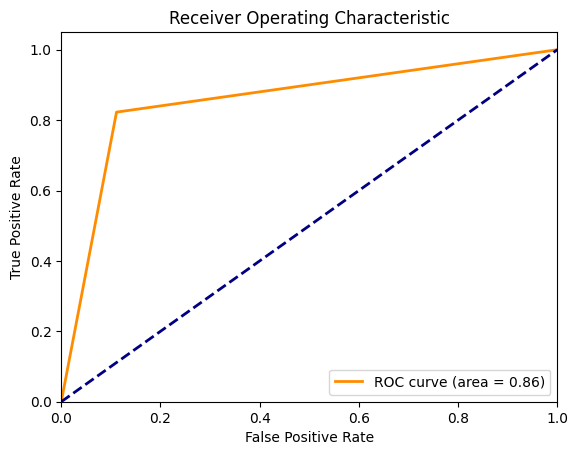

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(testing_set.y, preds_qrf)
roc_auc = roc_auc_score(testing_set.y, preds_qrf)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


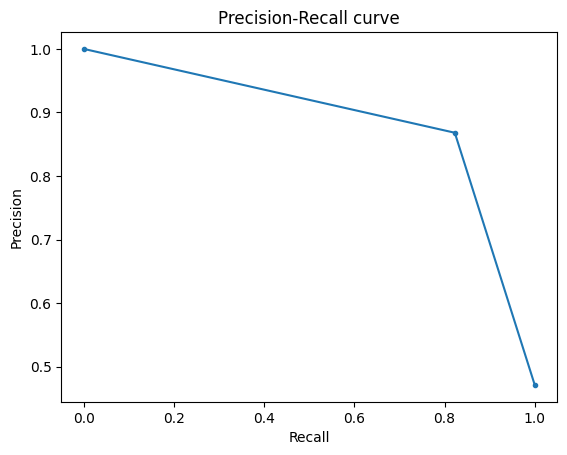

In [69]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(testing_set.y, preds_qrf)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()


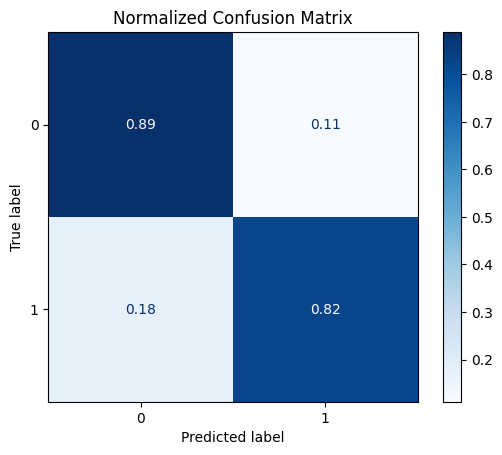

In [70]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_normalized = confusion_matrix(testing_set.y, preds_qrf, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized)
disp.plot(cmap=plt.cm.Blues)
plt.title("Normalized Confusion Matrix")
plt.show()


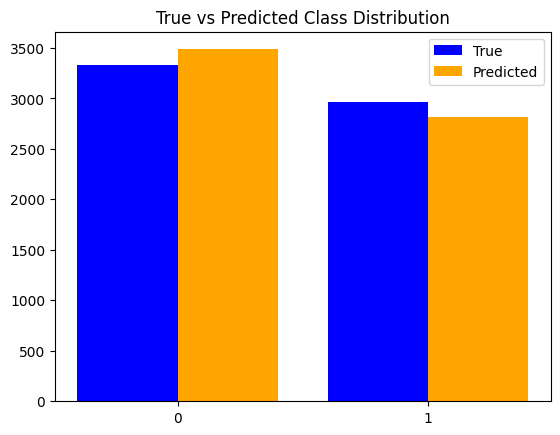

In [73]:
import numpy as np

# Plot histogram of predicted classes vs true classes
plt.hist([testing_set.y, preds_qrf], bins=np.arange(len(set(testing_set.y))+1)-0.5, label=['True', 'Predicted'], color=['blue', 'orange'])
plt.xticks(np.arange(len(set(testing_set.y))))
plt.legend(loc='best')
plt.title('True vs Predicted Class Distribution')
plt.show()


In [ ]:
QSVM  = qsvm()